In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('A:/MIPT/churn.csv')
df.drop('RowNumber', axis = 1, inplace = True)
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


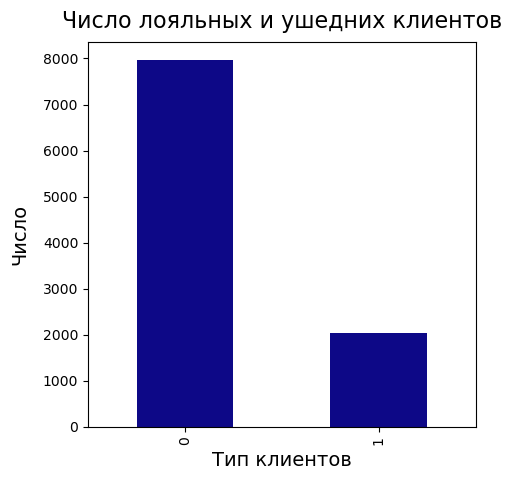

In [3]:
exited = df['Exited'].value_counts()
barplot = exited.plot(
    kind='bar',
    grid=False,
    figsize=(5, 5),
    colormap='plasma'
);

barplot.set_title('Число лояльных и ушедних клиентов', pad = 10, fontsize=16)
barplot.set_xlabel('Тип клиентов', fontsize = 14, labelpad = 4)
barplot.set_ylabel('Число', fontsize = 14, labelpad = 10);

In [4]:
print('Cоотношение лояльных (0) и ушедших (1) клиентов - примерно 4 к 1.')

Cоотношение лояльных (0) и ушедших (1) клиентов - примерно 4 к 1.


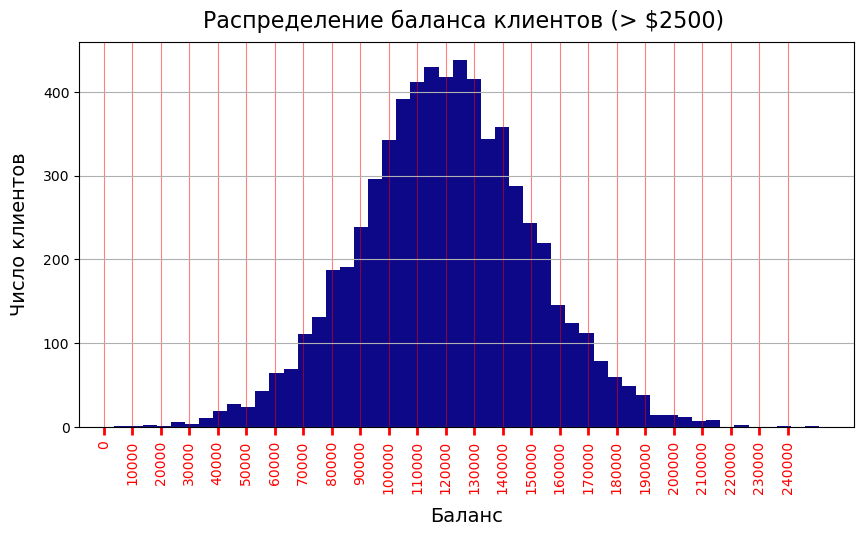

In [5]:
x = df[df['Balance'] > 2500]['Balance']
histplot = x.plot(
    kind='hist',
    bins = 50,
    figsize=(10, 5),
    grid = True,
    colormap='plasma'
);

histplot.set_xticks(range(0, 250000, 10000))

histplot.tick_params(axis ='x', direction='out', length=6, width=2, colors='r',
               grid_color='r', labelrotation = 90, grid_alpha=0.5)

histplot.set_title('Распределение баланса клиентов (> $2500) ', fontsize=16, pad = 10)
histplot.set_xlabel('Баланс', labelpad = 10.0, fontsize = 14)
histplot.set_ylabel('Число клиентов', labelpad = 10.0, fontsize = 14);


In [6]:
print('''Распределение по виду напоминает нормальное, с небольшой правосторонней асимметрией.
Клиентов с балансом более $250000 практически нет. Максимальное число клиентов имеет баланс $120000 - 130000.
Таким образом, модальный класс баланса клиентов с балансом более $2500: $ 120000 - 130000.''')

Распределение по виду напоминает нормальное, с небольшой правосторонней асимметрией.
Клиентов с балансом более $250000 практически нет. Максимальное число клиентов имеет баланс $120000 - 130000.
Таким образом, модальный класс баланса клиентов с балансом более $2500: $ 120000 - 130000.


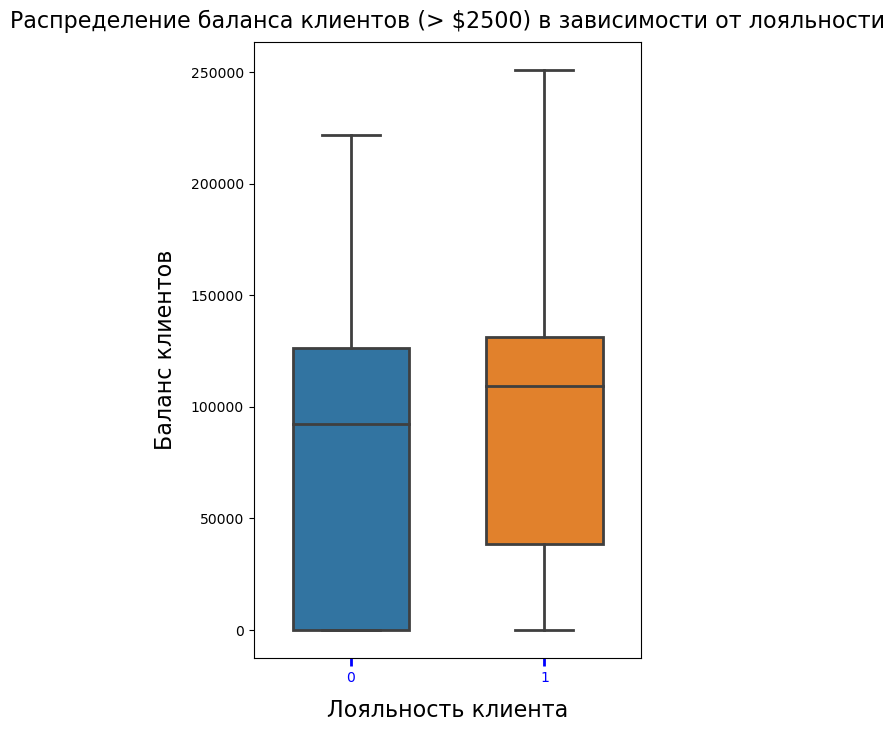

In [7]:
fig = plt.figure(figsize=(5, 8))
boxplot = sns.boxplot(data=df, y='Balance', x='Exited', width = 0.6, linewidth = 2)
boxplot.set_xlabel('Лояльность клиента', labelpad = 10.0, fontsize = 16)
boxplot.set_ylabel('Баланс клиентов', labelpad = 10.0, fontsize = 16)
boxplot.tick_params(axis ='x', direction='out', length=6, width=2, colors='b',
               grid_color='r', grid_alpha=0.5)
boxplot.set_title('Распределение баланса клиентов (> $2500) в зависимости от лояльности', fontsize=16, pad = 10);

In [8]:
print('''У лояльных клиентов медиана баланса меньше, чем у ушедших. Максимальные (более $220000) суммы балансы были у ушедших клиентов.
По-видимому, в данном банке невыгодно хранить слишком большие суммы денег. Возможно, это связано с низким процентом по вкладам.''')

У лояльных клиентов медиана баланса меньше, чем у ушедших. Максимальные (более $220000) суммы балансы были у ушедших клиентов.
По-видимому, в данном банке невыгодно хранить слишком большие суммы денег. Возможно, это связано с низким процентом по вкладам.


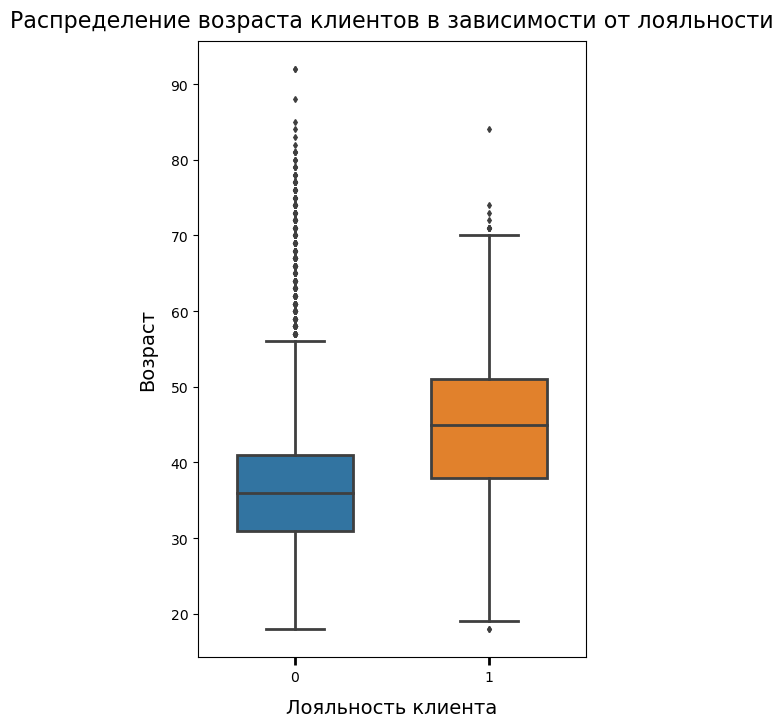

In [9]:
fig = plt.figure(figsize=(5, 8))
boxplot2 = sns.boxplot(data=df, y='Age', x='Exited', width = 0.6, linewidth = 2, orient = 'v', fliersize = 3)
boxplot2.set_xlabel('Лояльность клиента', labelpad = 10.0, fontsize = 14)
boxplot2.set_ylabel('Возраст', labelpad = 10.0, fontsize = 14)
boxplot2.tick_params(axis ='x', direction='out', length=6, width=2, colors='black', labelrotation = 0, grid_alpha=0.5)
boxplot2.set_title('Распределение возраста клиентов в зависимости от лояльности', fontsize=16, pad = 10);

In [10]:
print('''Потенциальных выбросов больше у лояльных клиентов: многие значения возраста слишком большие. 
Следует обратить внимание на старшую категорию клиентов (возраст порядка 45 лет и выше), так как у данной категории лояльность уменьшается.''')

Потенциальных выбросов больше у лояльных клиентов: многие значения возраста слишком большие. 
Следует обратить внимание на старшую категорию клиентов (возраст порядка 45 лет и выше), так как у данной категории лояльность уменьшается.


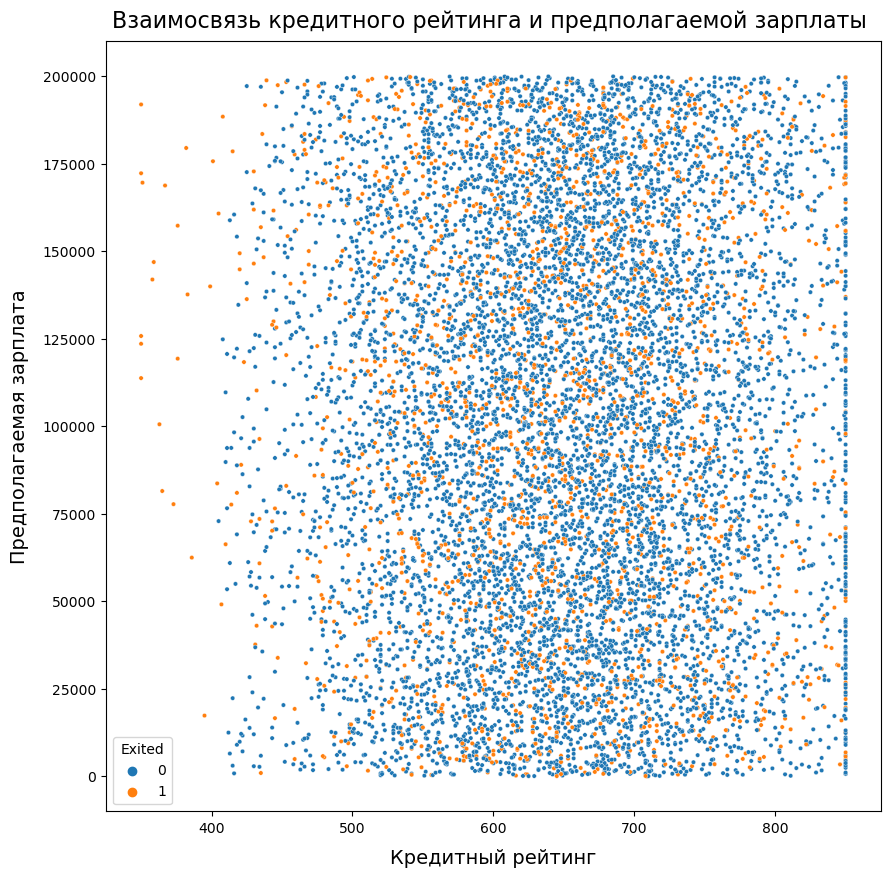

In [11]:
fig = plt.figure(figsize=(10, 10))

scatterplot = sns.scatterplot(
    data=df,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=10,
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты ', fontsize=16, pad = 10)
scatterplot.set_xlabel('Кредитный рейтинг', labelpad = 10.0, fontsize = 14)
scatterplot.set_ylabel('Предполагаемая зарплата', labelpad = 10.0, fontsize = 14);

In [12]:
print('''Явной взаимосвязи между кредитным рейтингом и предполагаемой зарплатой не наблюдается.''')

Явной взаимосвязи между кредитным рейтингом и предполагаемой зарплатой не наблюдается.


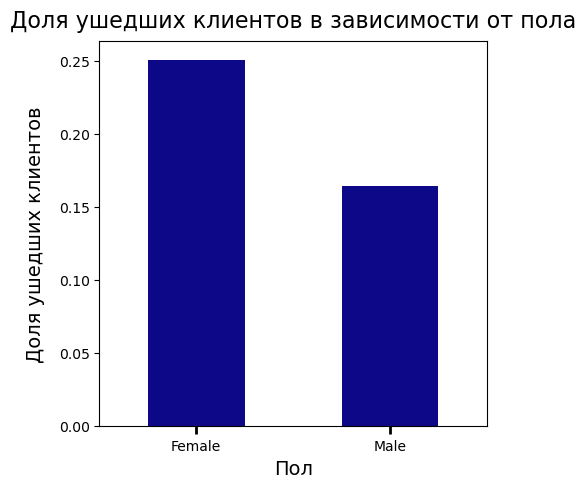

In [13]:
x = df.groupby(['Gender'])['Exited'].mean()
barplot = x.plot(
    kind='bar',
    grid=False,
    figsize=(5, 5),
    colormap='plasma'
);

barplot.set_title('Доля ушедших клиентов в зависимости от пола', pad = 10, fontsize=16)
barplot.set_xlabel('Пол', fontsize = 14, labelpad = 4)
barplot.set_ylabel('Доля ушедших клиентов', fontsize = 14, labelpad = 10);
barplot.tick_params(axis ='x', direction='out', length=6, width=2, colors='black', labelrotation = 0, grid_alpha=0.5)

In [14]:
print('''Чаще уходят женщины.''')

Чаще уходят женщины.


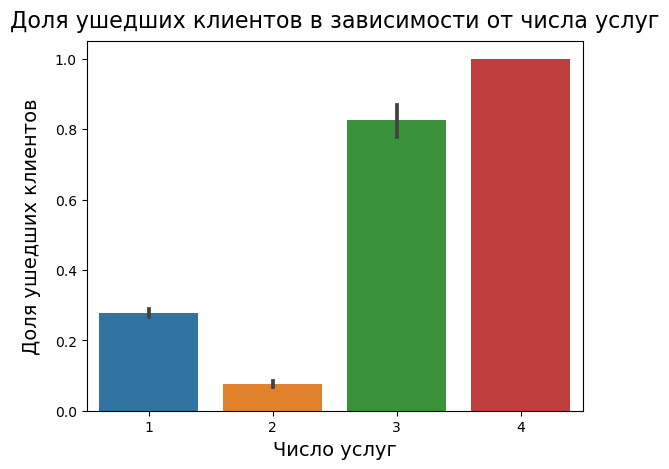

In [15]:
barplot = sns.barplot(
    data=df,
    x = 'NumOfProducts',
    y='Exited',
    orient='v',
);

barplot.set_title('Доля ушедших клиентов в зависимости от числа услуг', pad = 10, fontsize=16)
barplot.set_xlabel('Число услуг', fontsize = 14, labelpad = 4)
barplot.set_ylabel('Доля ушедших клиентов', fontsize = 14, labelpad = 10);

In [16]:
print('''Минимальный отток - в тех случаях, когда приобретены 2 услуги, максимальный (1.0) - в тех, когда приобретены 4 услуги.''')

Минимальный отток - в тех случаях, когда приобретены 2 услуги, максимальный (1.0) - в тех, когда приобретены 4 услуги.


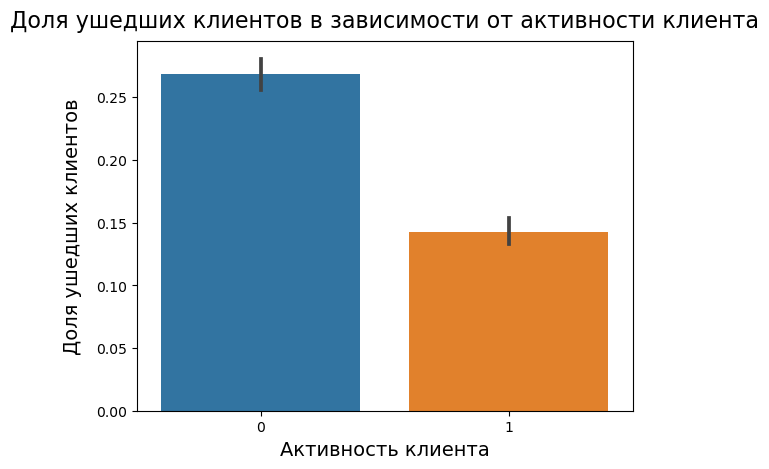

In [17]:
barplot = sns.barplot(
    data=df,
    x = 'IsActiveMember',
    y='Exited',
    orient='v',
);

barplot.set_title('Доля ушедших клиентов в зависимости от активности клиента', pad = 10, fontsize=16)
barplot.set_xlabel('Активность клиента', fontsize = 14, labelpad = 4)
barplot.set_ylabel('Доля ушедших клиентов', fontsize = 14, labelpad = 10);

In [18]:
print('''У неактивных клиентов (0) отток больше. 
Чтобы уменьшить отток, можно стимулировать активность клиентов различными предложениями - например, предложением открыть новый вклад.''')

У неактивных клиентов (0) отток больше. 
Чтобы уменьшить отток, можно стимулировать активность клиентов различными предложениями - например, предложением открыть новый вклад.


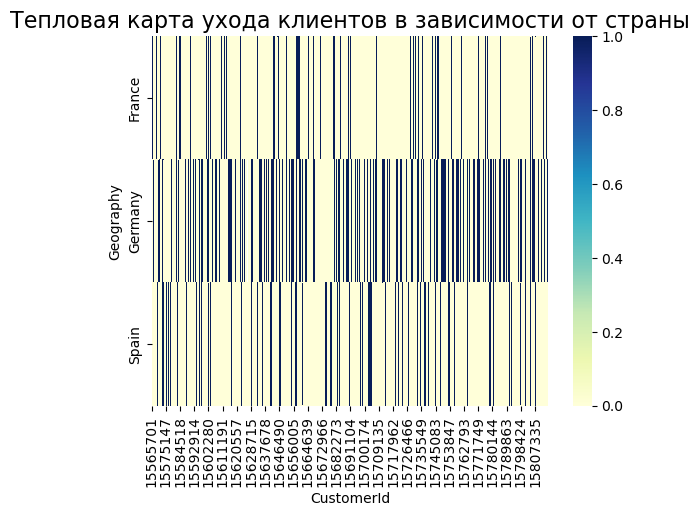

In [19]:
pivot = df.pivot_table(
    values='Exited',
    columns='CustomerId',
    index='Geography',
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ухода клиентов в зависимости от страны', fontsize=16);

In [20]:
print('''Наибольшая доля ушедших клиентов - в Германии.''')

Наибольшая доля ушедших клиентов - в Германии.


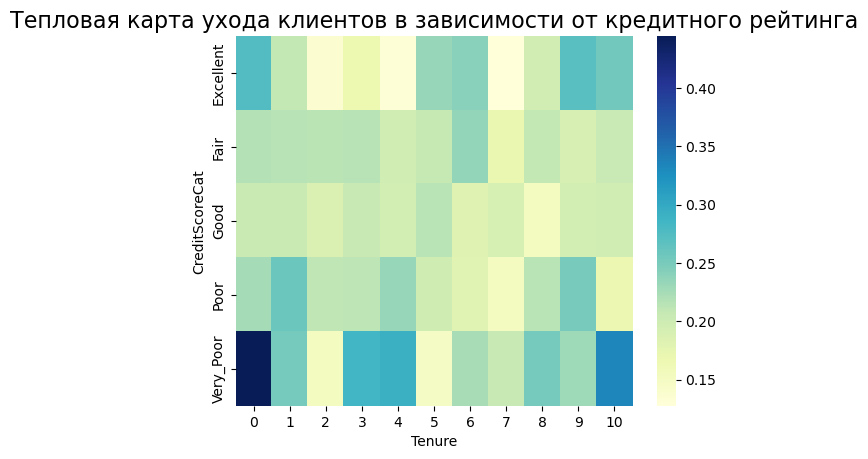

In [21]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"  
df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)

pivot = df.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ухода клиентов в зависимости от кредитного рейтинга', fontsize=16);

In [22]:
print('''Чаще всего уходят клиенты с очень плохим кредитным рейтингом (Very_Poor), которые пользовались услугами банка 0 лет.
На втором месте - клиенты с очень плохим кредитным рейтингом, которые пользовались услугами банка 10 лет.''')

Чаще всего уходят клиенты с очень плохим кредитным рейтингом (Very_Poor), которые пользовались услугами банка 0 лет.
На втором месте - клиенты с очень плохим кредитным рейтингом, которые пользовались услугами банка 10 лет.
